 ## LGMVIP - DATA SCIENCE

### BY:- VIDYA NARUTE 

### Task-2_EDA on Dataset-Terrorism

#### Import the relevant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

#### Load the data

In [7]:
pd.set_option("display.max_columns", None)
raw_data = pd.read_csv('globalterrorismdb_0718dist.csv' ,encoding=('ISO-8859-1'), low_memory=False )
raw_data

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN

In [8]:
raw_data.shape

(181691, 135)

In [9]:
#Fetching the neccessary columns only
data=raw_data[['iyear','imonth','iday','country_txt','region_txt','city','latitude','longitude','attacktype1_txt','nkill','nwound','target1','gname','targtype1_txt','weaptype1_txt']]

In [10]:
data.head()

,iyear,imonth,iday,country_txt,region_txt,city,latitude,longitude,attacktype1_txt,nkill,nwound,target1,gname,targtype1_txt,weaptype1_txt
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,MANO-D,Private Citizens & Property,Unknown
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",23rd of September Communist League,Government (Diplomatic),Unknown
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,Unknown,Journalists & Media,Unknown
3,1970,1,0,Greece,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,Unknown,Government (Diplomatic),Explosives
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,Unknown,Government (Diplomatic),Incendiary


In [11]:
data.shape

(181691, 15)

In [12]:
data.isnull().sum()

iyear                  0
imonth                 0
iday                   0
country_txt            0
region_txt             0
city                 434
latitude            4556
longitude           4557
attacktype1_txt        0
nkill              10313
nwound             16311
target1              636
gname                  0
targtype1_txt          0
weaptype1_txt          0
dtype: int64

In [13]:
data.dropna(axis=0, inplace=True)
data

,iyear,imonth,iday,country_txt,region_txt,city,latitude,longitude,attacktype1_txt,nkill,nwound,target1,gname,targtype1_txt,weaptype1_txt
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,MANO-D,Private Citizens & Property,Unknown
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",23rd of September Communist League,Government (Diplomatic),Unknown
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,Unknown,Journalists & Media,Unknown
5,1970,1,1,United States,North America,Cairo,37.005105,-89.176269,Armed Assault,0.0,0.0,Cairo Police Headquarters,Black Nationalists,Police,Firearms
6,1970,1,2,Uruguay,South America,Montevideo,-34.891151,-56.187214,Assassination,0.0,0.0,Juan Maria de Lucah/Chief of Directorate of in...,Tupamaros (Uruguay),Police,Firearms
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,12,31,Somalia,Sub-Saharan Africa,Ceelka Geelow,2.359673,45.385034,Armed Assault,1.0,2.0,Checkpoint,Al-Shabaab,Military,Firearms
181687,2017,12,31,Syria,Middle East & North Africa,Jableh,35.407278,35.942679,Bombing/Explosion,2.0,7.0,Hmeymim Air Base,Muslim extremists,Military,Explosives
181688,2017,12,31,Philippines,Southeast Asia,Kubentog,6.900742,124.437908,Facility/Infrastructure Attack,0.0,0.0,Houses,Bangsamoro Islamic Freedom Movement (BIFM),Private Citizens & Property,Incendiary
181689,2017,12,31,India,South Asia,Imphal,24.798346,93.940430,Bombing/Explosion,0.0,0.0,Office,Unknown,Government (General),Explosives


In [14]:
data.shape

(159946, 15)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159946 entries, 0 to 181690
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   iyear            159946 non-null  int64  
 1   imonth           159946 non-null  int64  
 2   iday             159946 non-null  int64  
 3   country_txt      159946 non-null  object 
 4   region_txt       159946 non-null  object 
 5   city             159946 non-null  object 
 6   latitude         159946 non-null  float64
 7   longitude        159946 non-null  float64
 8   attacktype1_txt  159946 non-null  object 
 9   nkill            159946 non-null  float64
 10  nwound           159946 non-null  float64
 11  target1          159946 non-null  object 
 12  gname            159946 non-null  object 
 13  targtype1_txt    159946 non-null  object 
 14  weaptype1_txt    159946 non-null  object 
dtypes: float64(4), int64(3), object(8)
memory usage: 19.5+ MB


#### PLOTTING TERRORIST ACTIVITES OF EACH YEAR

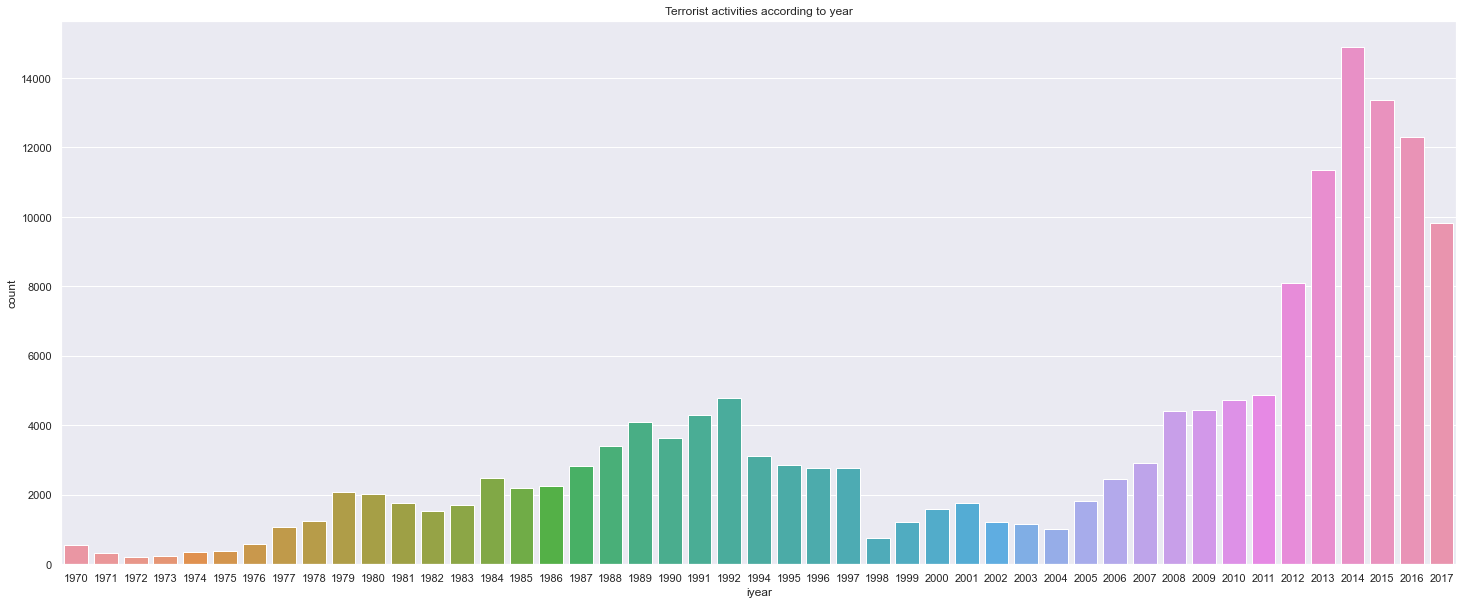

In [21]:
plt.figure(figsize =(25,10))
sns.countplot(x = 'iyear', data=data)
plt.title('Terrorist activities according to year')
plt.show()

##### *From the above graph we can conclude that from year 1979 to 1997 there are various terrorist attacks as we move forward towards year 2012, from 2012 to 2017 the number of terrorist attacks is very high and we observe the most in year 2014.*

#### Plotting Countries according to the terrorist activities

([<matplotlib.axis.XTick at 0x20085dc4490>,
 [Text(0, 0, 'Iraq'),
  Text(1, 0, 'Pakistan'),
  Text(2, 0, 'Afghanistan'),
  Text(3, 0, 'India'),
  Text(4, 0, 'Colombia'),
  Text(5, 0, 'Philippines'),
  Text(6, 0, 'Peru'),
  Text(7, 0, 'Turkey'),
  Text(8, 0, 'Thailand'),
  Text(9, 0, 'El Salvador'),
  Text(10, 0, 'United Kingdom'),
  Text(11, 0, 'Somalia'),
  Text(12, 0, 'Spain'),
  Text(13, 0, 'Yemen'),
  Text(14, 0, 'Nigeria')])

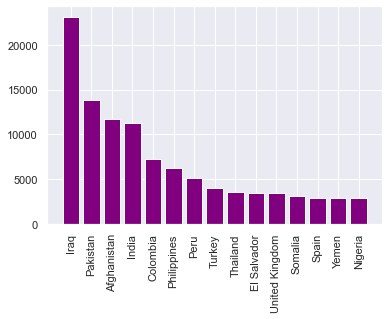

In [24]:
count_list_countries = Counter(data['country_txt']).most_common(15)
D = dict(count_list_countries)

plt.bar(range(len(D)), list(D.values()), align='center',color='purple')
plt.xticks(range(len(D)), list(D.keys()), rotation = 'vertical')

##### *Iraq has the most terrorist activites followed by pakistan and so on.*

#### PLOTTING THE CASUALITIES

In [26]:
# CREATING A COPY OF DATA TO ADD AN ADDITIONAL COLUMN OF CASUALITIES THAT CONSIST OF SUM OF COLUMNS WOUNDED AND KILLED
data_copy = data
data_copy['Casualities'] = data['nkill'] + data['nwound']

In [27]:
# Creating a small dataframe to plot it on a bar graph to show casualities according to year
year_cas = data_copy.groupby('iyear').Casualities.sum().to_frame().reset_index()
year_cas.columns = ['Year','Casualities']

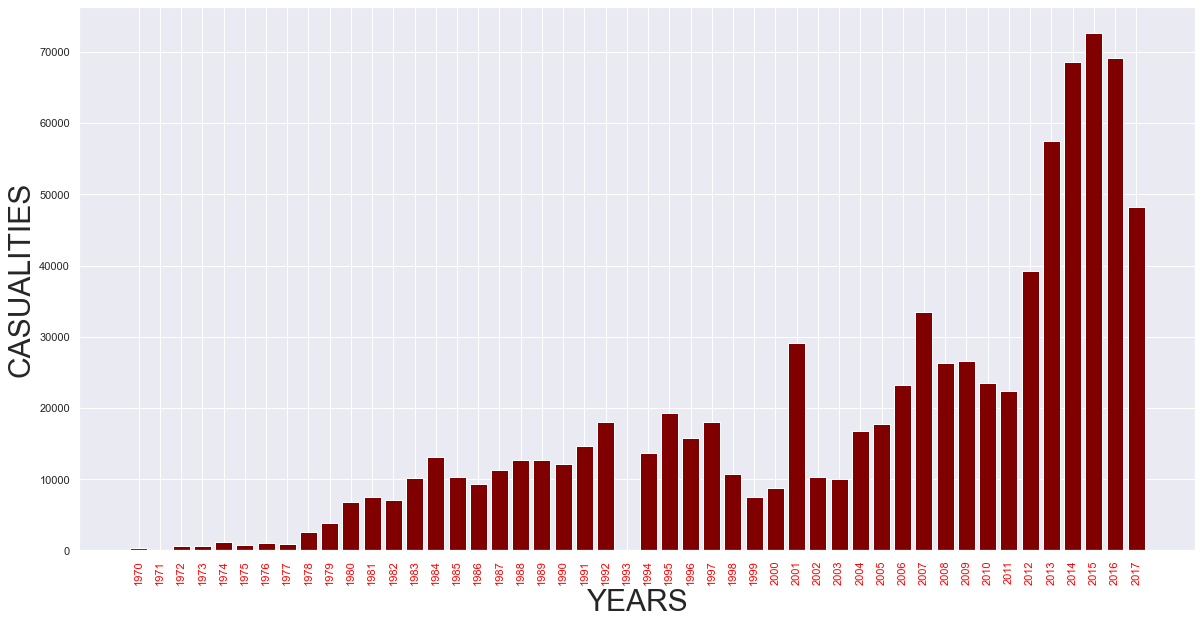

In [30]:
# Plotting a bar graph
plt.figure(figsize = (20,10))

plt.bar(year_cas['Year'], year_cas['Casualities'],color='maroon')
plt.xticks(np.arange(min(year_cas['Year']), max(year_cas['Year'])+1, 1.0), rotation='vertical',color='red')
plt.xlabel('YEARS', size=30)
plt.ylabel('CASUALITIES', size=30)

plt.show()

#### TYPES OF ATTACKS

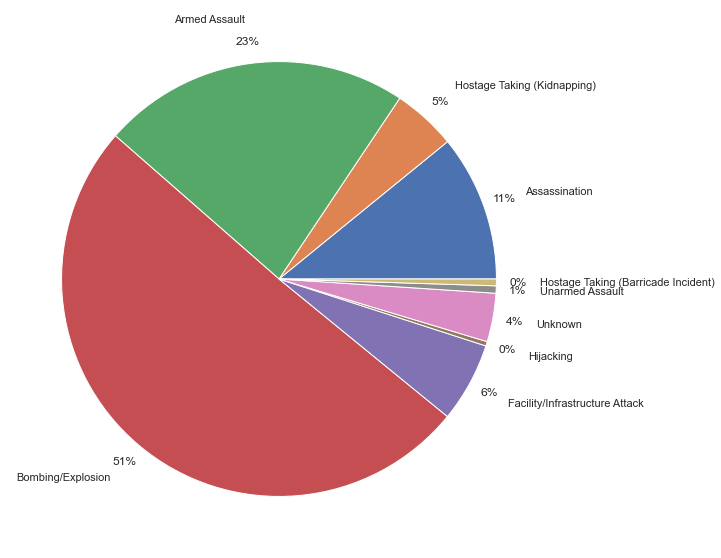

In [31]:
# Creating a count of every individual attack type to plot it in a pie chart
count_list_assanssination = Counter(data['attacktype1_txt'])

# Get the Keys and store them in a list
labels = list(count_list_assanssination.keys())
# Get the Values and store them in a list
values = list(count_list_assanssination.values())

# Plotting the data in a pie chart
plt.figure(figsize=(10,10))
plt.pie(values, labels=labels,  autopct='%1.0f%%',  pctdistance=1.1, labeldistance=1.2)
plt.show()

##### *The Pie chart shows us that the most type of attack is BOMBING / EXPLOSION followed by ARMED ASSAULT*

#### TYPES OF TARGETS

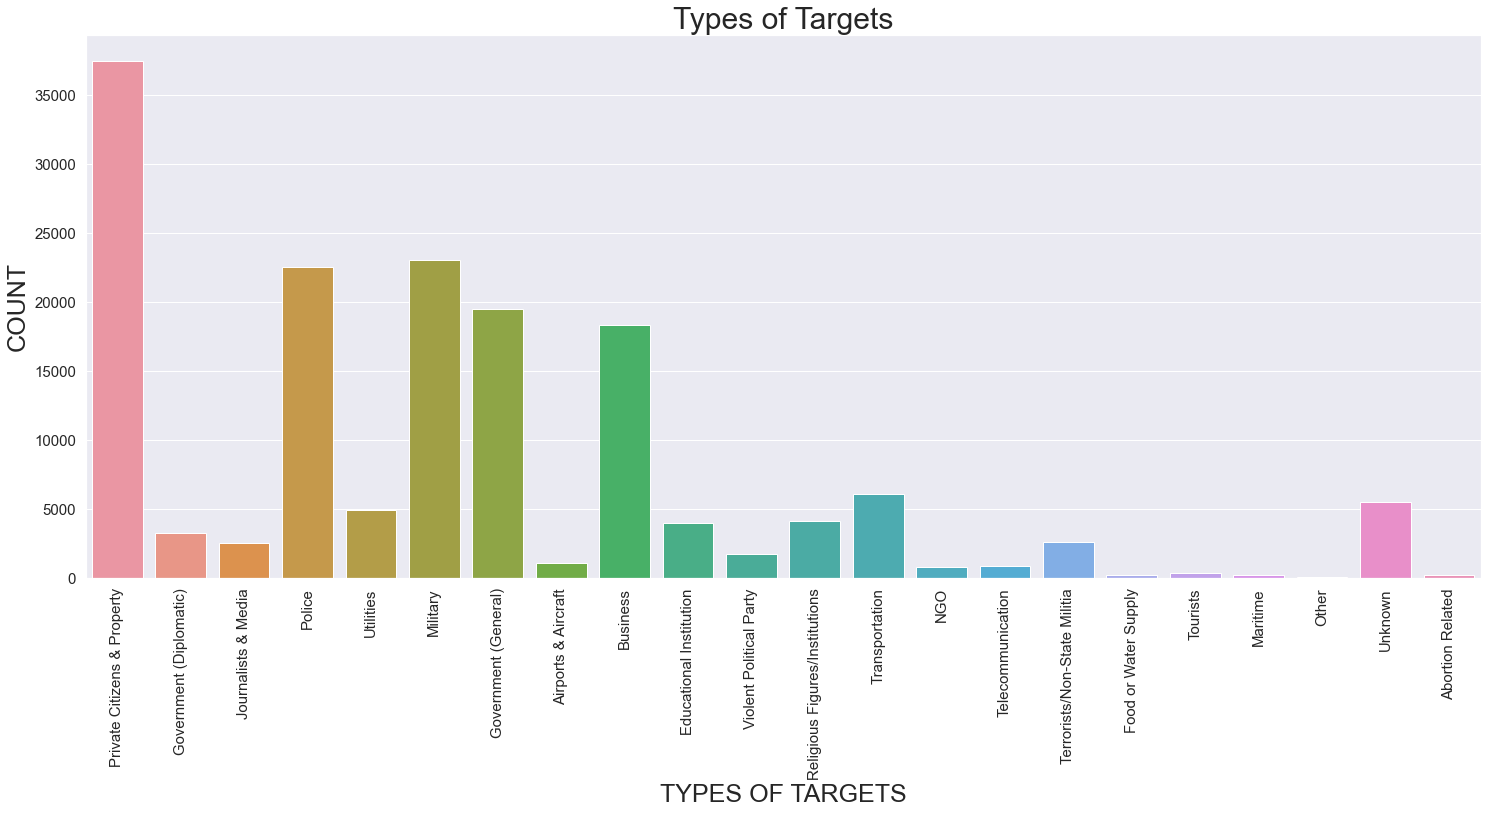

In [32]:
plt.figure(figsize =(25,10))
sns.countplot(x = 'targtype1_txt', data=data)
plt.title('Types of Targets', size = 30)
plt.xlabel("TYPES OF TARGETS", size = 25)
plt.ylabel("COUNT", size = 25)

plt.xticks(rotation='vertical', size = 15)
plt.yticks(size=15)
plt.show()

#### FINDING the HOT-ZONE of Terrorism on the basis of highest year of Terrorist Attack i.e. 2014.

In [33]:
# Extracting only the data that belongs to year 2014
data_fourteen = data_copy[data_copy['iyear']==2014]
data_fourteen

,iyear,imonth,iday,country_txt,region_txt,city,latitude,longitude,attacktype1_txt,nkill,nwound,target1,gname,targtype1_txt,weaptype1_txt,Casualities
125335,2014,1,1,Colombia,South America,Convencion,8.868790,-73.194094,Bombing/Explosion,0.0,0.0,Crude Oil Holding Pools,National Liberation Army of Colombia (ELN),Utilities,Explosives,0.0
125336,2014,1,1,Somalia,Sub-Saharan Africa,Mogadishu,2.059819,45.326115,Bombing/Explosion,4.0,20.0,Hotel,Al-Shabaab,Business,Explosives,24.0
125337,2014,1,1,Pakistan,South Asia,Quetta,30.200819,66.994354,Bombing/Explosion,3.0,31.0,Shia Pilgrims,Jaish-e-Islam,Private Citizens & Property,Explosives,34.0
125338,2014,1,1,Pakistan,South Asia,Dera Bugti,29.034412,69.158661,Bombing/Explosion,0.0,0.0,Unknown,Unknown,Unknown,Explosives,0.0
125340,2014,1,1,Iraq,Middle East & North Africa,Mosul,36.354145,43.143570,Bombing/Explosion,2.0,6.0,Patrol,Unknown,Military,Explosives,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142235,2014,12,30,Yemen,Middle East & North Africa,Ash Shihr,14.762732,49.605728,Armed Assault,0.0,0.0,Officer,Al-Qaida in the Arabian Peninsula (AQAP),Police,Firearms,0.0
142236,2014,12,31,Algeria,Middle East & North Africa,Algiers,36.763763,3.055413,Bombing/Explosion,0.0,0.0,Unknown,Unknown,Unknown,Explosives,0.0
142237,2014,12,31,Indonesia,Southeast Asia,Lembah Napu,-1.753123,120.643559,Hostage Taking (Kidnapping),1.0,0.0,Civilian,Mujahidin Indonesia Timur (MIT),Private Citizens & Property,Unknown,1.0
143507,2014,12,27,Afghanistan,South Asia,Saberi district,33.566561,69.878354,Bombing/Explosion,5.0,0.0,Civilians,Taliban,Private Citizens & Property,Explosives,5.0


In [34]:
data_fourteen_country_count = Counter(data_fourteen['country_txt'])
labels_1 = list(data_fourteen_country_count.keys())

values_1 = list(data_fourteen_country_count.values())

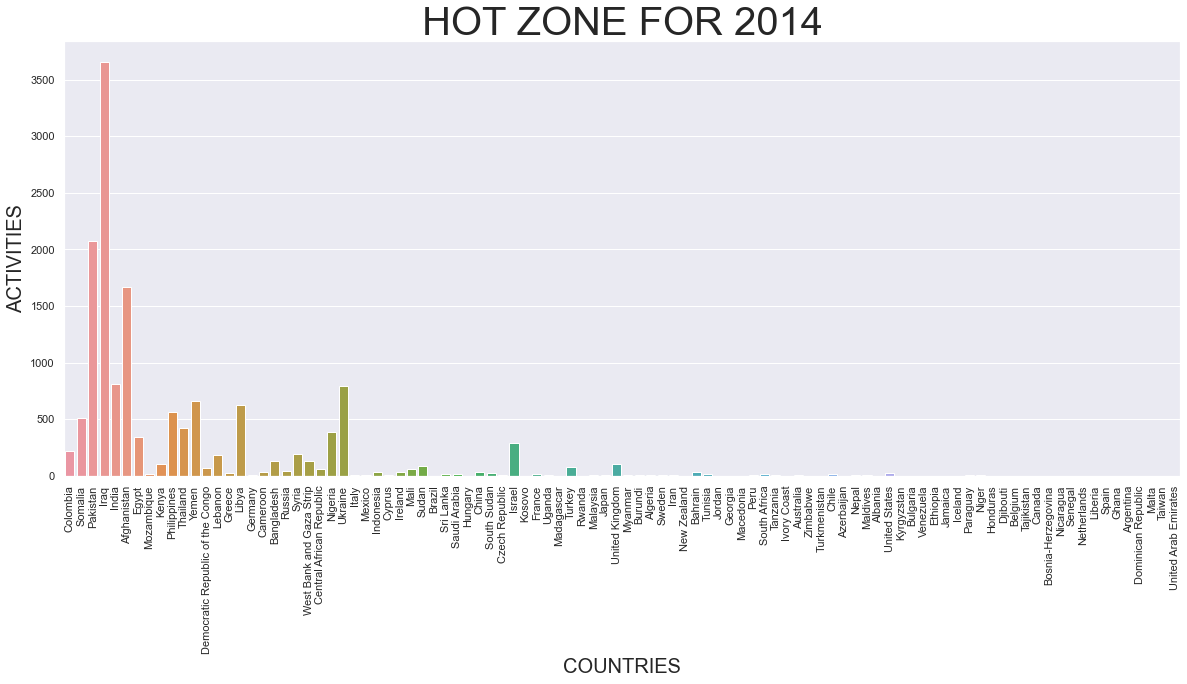

In [35]:
plt.figure(figsize = (20, 8))
sns.barplot(labels_1, values_1 )
plt.xticks(rotation='vertical')
plt.title('HOT ZONE FOR 2014', size = 40)
plt.xlabel('COUNTRIES', size = 20)
plt.ylabel('ACTIVITIES', size = 20)
plt.show()

#### TYPES OF WEAPONS USED AND THERE FREQUENCY

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

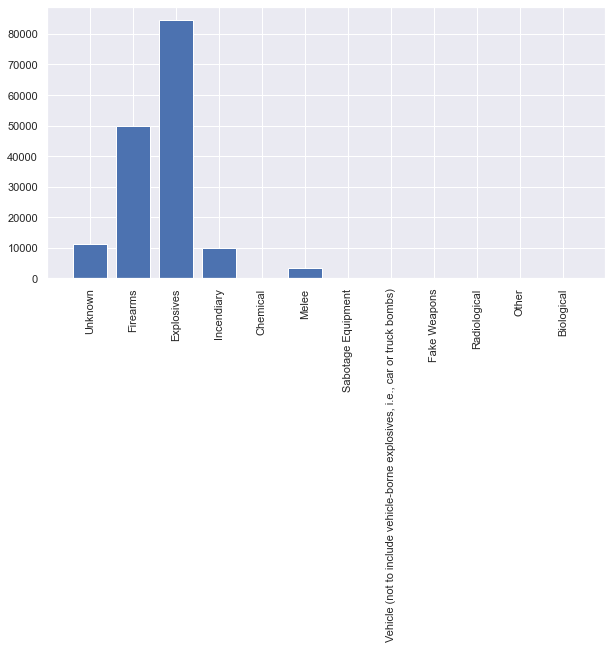

In [36]:
count_list_wpt = Counter(data['weaptype1_txt'])
labels_3 = list(count_list_wpt.keys())

values_3 = list(count_list_wpt.values())
plt.figure(figsize=(10,5))
plt.bar(labels_3, values_3)
plt.xticks(rotation = 'vertical')

#### The most common weapon used were EXPLOIVES AND FIREARMS